In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,Normalizer
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'gas_turbines.csv')

In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
df=df.drop(['AFDP', 'GTEP', 'TIT', 'TAT','CDP', 'CO', 'NOX'],axis=1)
df

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [39]:
scaler=MinMaxScaler()
data=scaler.fit_transform(df)
data

array([[0.18418215, 0.45604964, 0.95131413, 0.19519076],
       [0.18201978, 0.4663909 , 0.95588067, 0.19545943],
       [0.18529531, 0.47466391, 0.93900309, 0.19532509],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, 0.13460505],
       [0.18844295, 0.43329886, 0.98293633, 0.14199355],
       [0.18617304, 0.44157187, 0.96182146, 0.15327781]])

In [40]:
df1=pd.DataFrame(data,columns=df.columns)
df1

,AT,AP,AH,TEY
0,0.184182,0.456050,0.951314,0.195191
1,0.182020,0.466391,0.955881,0.195459
2,0.185295,0.474664,0.939003,0.195325
3,0.189922,0.482937,0.929126,0.195459
4,0.199830,0.493278,0.927708,0.195459
...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.153681
15035,0.214075,0.414685,0.984153,0.155965
15036,0.195962,0.422958,0.989922,0.134605
15037,0.188443,0.433299,0.982936,0.141994


<Axes: >

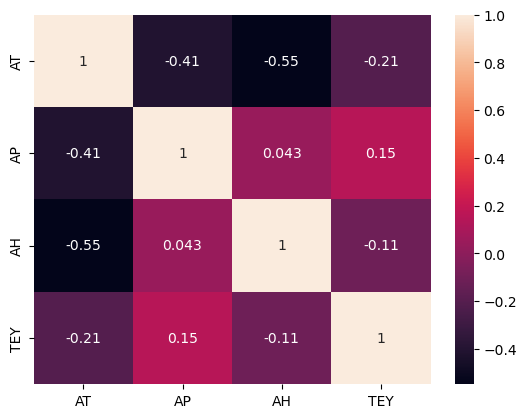

In [41]:
sns.heatmap(df1.corr(),annot=True)

In [42]:
X=df1.drop('TEY',axis=1)
X

,AT,AP,AH
0,0.184182,0.456050,0.951314
1,0.182020,0.466391,0.955881
2,0.185295,0.474664,0.939003
3,0.189922,0.482937,0.929126
4,0.199830,0.493278,0.927708
...,...,...,...
15034,0.247272,0.408480,0.975092
15035,0.214075,0.414685,0.984153
15036,0.195962,0.422958,0.989922
15037,0.188443,0.433299,0.982936


In [43]:
Y=df1[['TEY']]
Y

,TEY
0,0.195191
1,0.195459
2,0.195325
3,0.195459
4,0.195459
...,...
15034,0.153681
15035,0.155965
15036,0.134605
15037,0.141994


In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=30)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11279, 3), (3760, 3), (11279, 1), (3760, 1))

In [46]:
mse=MeanSquaredError()

In [47]:
model=Sequential()

In [48]:
model.add(Dense(30,activation='relu',input_shape=(3,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                120       
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 761 (2.97 KB)
Trainable params: 761 (2.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss=mse,metrics='accuracy')

In [50]:
history=model.fit(x_train,y_train,epochs=20,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/20
113/113 [==============================] - 1s 5ms/step - loss: 0.0476 - accuracy: 8.8660e-05 - val_loss: 0.0441 - val_accuracy: 0.0000e+00
Epoch 2/20
113/113 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 8.8660e-05 - val_loss: 0.0421 - val_accuracy: 0.0000e+00
Epoch 3/20
113/113 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 8.8660e-05 - val_loss: 0.0416 - val_accuracy: 0.0000e+00
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 0.0398 - accuracy: 8.8660e-05 - val_loss: 0.0402 - val_accuracy: 0.0000e+00
Epoch 5/20
113/113 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 8.8660e-05 - val_loss: 0.0398 - val_accuracy: 0.0000e+00
Epoch 6/20
113/113 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 8.8660e-05 - val_loss: 0.0394 - val_accuracy: 0.0000e+00
Epoch 7/20
113/113 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 8.8660e

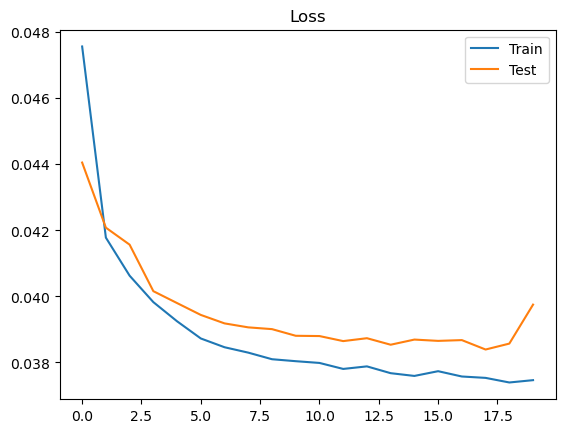

In [51]:
plt.plot(range(20),history.history['loss'],label='Train')
plt.plot(range(20),history.history['val_loss'],label='Test')
plt.title('Loss')
plt.legend()

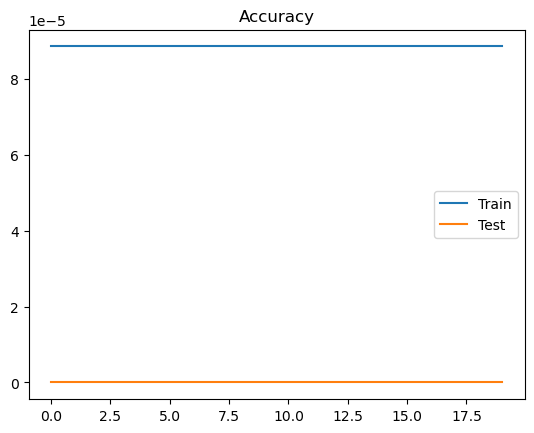

In [52]:
plt.plot(range(20),history.history['accuracy'],label='Train')
plt.plot(range(20),history.history['val_accuracy'],label='Test')
plt.title('Accuracy')
plt.legend()

In [53]:
model.evaluate(x_train, y_train)

353/353 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 8.8660e-05


[0.038417503237724304, 8.86603447725065e-05]